In [769]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [770]:
df_train = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/train_revised.csv')

In [771]:
df_train.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49

In [772]:
df_test = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/test_questions.csv') 

In [773]:
df_test.head()

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  
0            49  
1            11  
2            11  
3            11  
4            11

Extracting Year,Month,Day,Weekday and Weekend from Travel Date

Extracting Hour and Minutes from Travel Time

In [774]:

df_test["travel_date"] = pd.to_datetime(df_test["travel_date"])
df_test["year"] = df_test["travel_date"].dt.year
df_test["month"] = df_test["travel_date"].dt.month
df_test["day"] = df_test["travel_date"].dt.day
df_test["weekday"] = df_test["travel_date"].dt.weekday
df_test["is_weekend"] = df_test["weekday"].apply(lambda x: 1 if x >= 5 else 0) 

df_test['hour'] = df_test['travel_time'].str.split(':').str[0].astype(int)  
df_test['minute'] = df_test['travel_time'].str.split(':').str[1].astype(int) 

df_test.head()

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  year  month  day  weekday  is_weekend  hour  minute  
0            49  2018      5    7        0           0     7       6  
1            11  2018      5    6        6           1    11       8  
2            11  2018      5    4        4           0     5       0  
3            11  2018      5    4        4           0     9      10  
4            11  2018      5    4        4           0     9      20

Extracting Year,Month,Day,Weekday and Weekend from Travel Date


Extracting Hour and Minutes from Travel Time

In [775]:

df_train['travel_date'] = pd.to_datetime(df_train['travel_date'], format='%d-%m-%y')
df_train['year'] = df_train['travel_date'].dt.year  
df_train['month'] = df_train['travel_date'].dt.month  
df_train['day'] = df_train['travel_date'].dt.day 
df_train["weekday"] = df_train["travel_date"].dt.weekday
df_train["is_weekend"] = df_train["weekday"].apply(lambda x: 1 if x >= 5 else 0) 

df_train['hour'] = df_train['travel_time'].str.split(':').str[0].astype(int)  
df_train['minute'] = df_train['travel_time'].str.split(':').str[1].astype(int)  

df_train.head()  

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO  2017-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE  2017-11-19        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O  2017-11-26        7:05   
3     5777         19A          Mpesa      SGP18CL0ME  2017-11-27        7:10   
4     5778         11A          Mpesa      BM97HFRGL9  2017-11-27        7:12   

  travel_from travel_to car_type  max_capacity  year  month  day  weekday  \
0      Migori   Nairobi      Bus            49  2017     10   17        1   
1      Migori   Nairobi      Bus            49  2017     11   19        6   
2      Keroka   Nairobi      Bus            49  2017     11   26        6   
3    Homa Bay   Nairobi      Bus            49  2017     11   27        0   
4      Migori   Nairobi      Bus            49  2017     11   27        0   

   is_weekend  hour  minute  
0           0     7      15  
1           1     7      12  
2           1     7       5  
3           0     7      10  
4           0     7      12

Calculating Number Of Tickets from Train datasets

In [776]:

df_train_tickets = df_train.groupby("ride_id").size().reset_index(name="number_of_tickets")
df_train = df_train.merge(df_train_tickets, on="ride_id")
df_train.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO  2017-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE  2017-11-19        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O  2017-11-26        7:05   
3     5777         19A          Mpesa      SGP18CL0ME  2017-11-27        7:10   
4     5778         11A          Mpesa      BM97HFRGL9  2017-11-27        7:12   

  travel_from travel_to car_type  max_capacity  year  month  day  weekday  \
0      Migori   Nairobi      Bus            49  2017     10   17        1   
1      Migori   Nairobi      Bus            49  2017     11   19        6   
2      Keroka   Nairobi      Bus            49  2017     11   26        6   
3    Homa Bay   Nairobi      Bus            49  2017     11   27        0   
4      Migori   Nairobi      Bus            49  2017     11   27        0   

   is_weekend  hour  minute  number_of_tickets  
0           0     7      15                  1  
1           1     7      12                  1  
2           1     7       5                  1  
3           0     7      10                  5  
4           0     7      12                 31

In [816]:
df_train.columns

Index(['ride_id', 'travel_from', 'max_capacity', 'year', 'month', 'day',
       'weekday', 'is_weekend', 'hour', 'minute', 'number_of_tickets',
       'payment_method_Mpesa', 'car_type_shuttle', 'travel_from_encoded'],
      dtype='object')

Explotary Data Analysis:

In [778]:
# !pip install  sweetviz
# import sweetviz as sv
# report = sv.analyze(df_train)
# report.show_html("claims_analysis_sweetviz_report.html")
# report.show_notebook()

Calculating Average Number of Tickets

In [779]:

average_tickets = df_train["number_of_tickets"].mean()
print(f"Average number of tickets: {average_tickets}")

Average number of tickets: 17.280917804240488


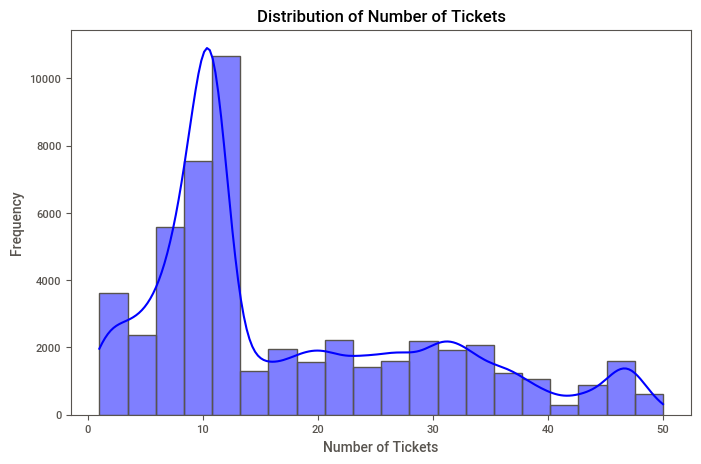

In [780]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df_train["number_of_tickets"], bins=20, kde=True, color="blue")
plt.title("Distribution of Number of Tickets")
plt.xlabel("Number of Tickets")
plt.ylabel("Frequency")
plt.show()

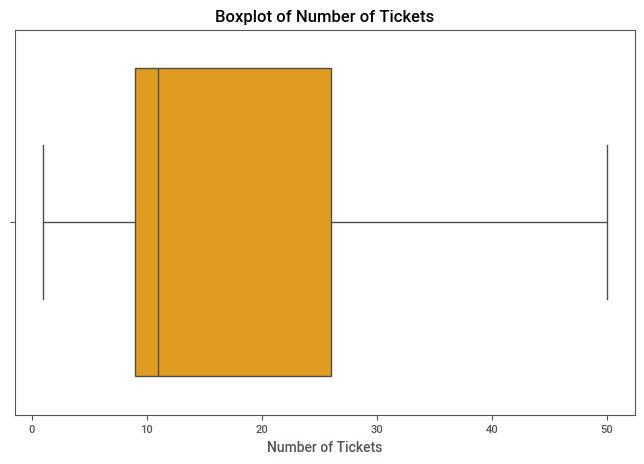

In [781]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["number_of_tickets"], color="orange")
plt.title("Boxplot of Number of Tickets")
plt.xlabel("Number of Tickets")
plt.show()

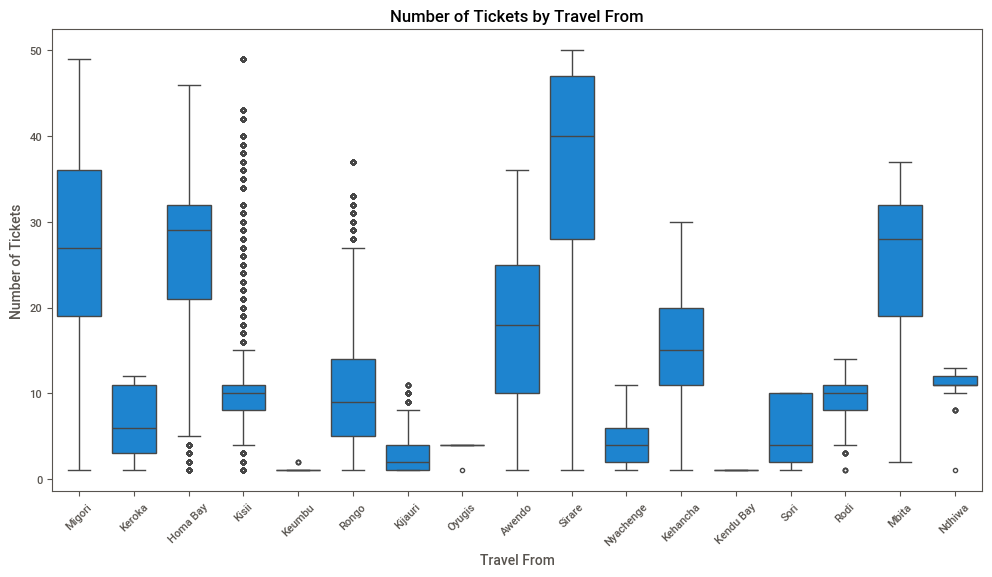

In [782]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="travel_from", y="number_of_tickets", data=df_train)
plt.title("Number of Tickets by Travel From")
plt.xlabel("Travel From")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.show()

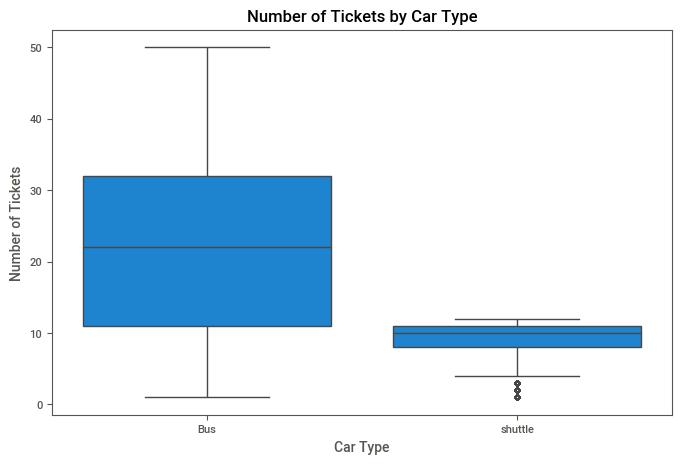

In [783]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="car_type", y="number_of_tickets", data=df_train)
plt.title("Number of Tickets by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Number of Tickets")
plt.show()

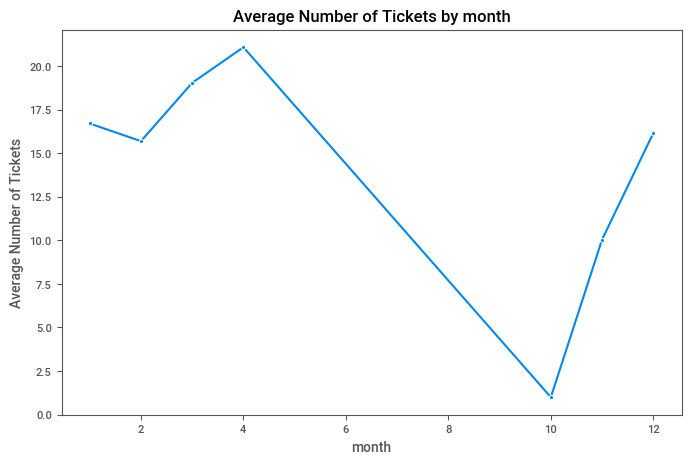

In [784]:

monthly_tickets = df_train.groupby("month")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="month", y="number_of_tickets", data=monthly_tickets, marker="o")
plt.title("Average Number of Tickets by month")
plt.xlabel("month")
plt.ylabel("Average Number of Tickets")
plt.show()

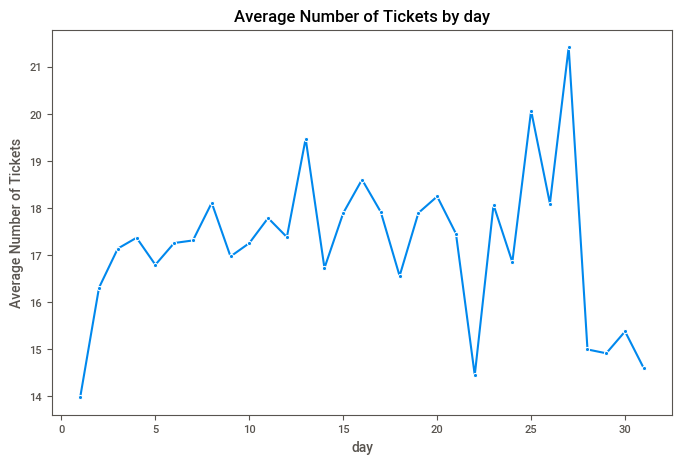

In [785]:

daily_tickets = df_train.groupby("day")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="day", y="number_of_tickets", data=daily_tickets, marker="o")
plt.title("Average Number of Tickets by day")
plt.xlabel("day")
plt.ylabel("Average Number of Tickets")
plt.show()

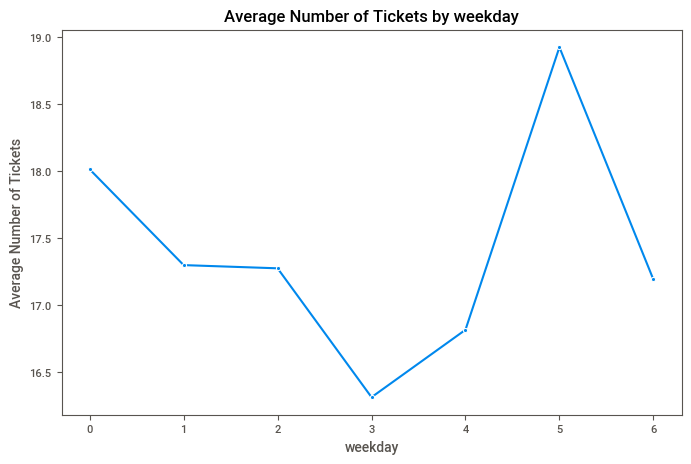

In [786]:

weekdaily_tickets = df_train.groupby("weekday")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="weekday", y="number_of_tickets", data=weekdaily_tickets, marker="o")
plt.title("Average Number of Tickets by weekday")
plt.xlabel("weekday")
plt.ylabel("Average Number of Tickets")
plt.show()

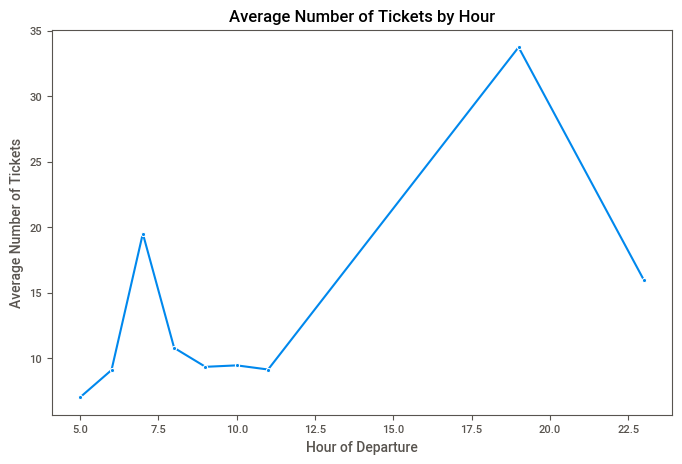

In [787]:

hourly_tickets = df_train.groupby("hour")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="hour", y="number_of_tickets", data=hourly_tickets, marker="o")
plt.title("Average Number of Tickets by Hour")
plt.xlabel("Hour of Departure")
plt.ylabel("Average Number of Tickets")
plt.show()

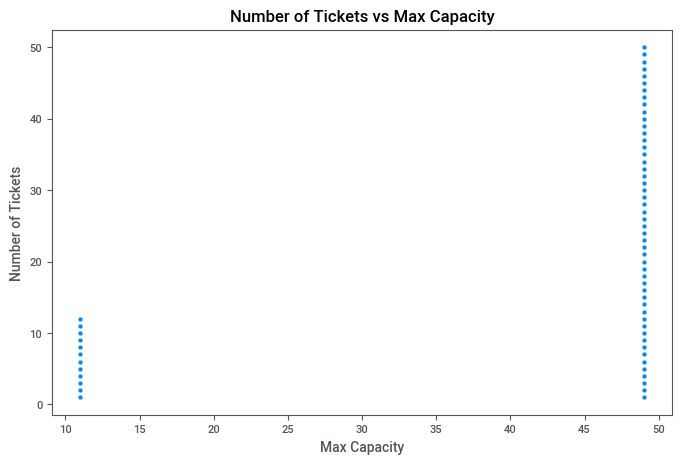

In [788]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x="max_capacity", y="number_of_tickets", data=df_train, alpha=0.7)
plt.title("Number of Tickets vs Max Capacity")
plt.xlabel("Max Capacity")
plt.ylabel("Number of Tickets")
plt.show()

Feature Engineering And Selection:

In [789]:
df_train.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO  2017-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE  2017-11-19        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O  2017-11-26        7:05   
3     5777         19A          Mpesa      SGP18CL0ME  2017-11-27        7:10   
4     5778         11A          Mpesa      BM97HFRGL9  2017-11-27        7:12   

  travel_from travel_to car_type  max_capacity  year  month  day  weekday  \
0      Migori   Nairobi      Bus            49  2017     10   17        1   
1      Migori   Nairobi      Bus            49  2017     11   19        6   
2      Keroka   Nairobi      Bus            49  2017     11   26        6   
3    Homa Bay   Nairobi      Bus            49  2017     11   27        0   
4      Migori   Nairobi      Bus            49  2017     11   27        0   

   is_weekend  hour  minute  number_of_tickets  
0           0     7      15                  1  
1           1     7      12                  1  
2           1     7       5                  1  
3           0     7      10                  5  
4           0     7      12                 31

In [790]:

df_train = df_train.drop(columns=["seat_number", "payment_receipt","travel_to","travel_date","travel_time"])
df_train.head()

ride_id payment_method travel_from car_type  max_capacity  year  month  \
0     1442          Mpesa      Migori      Bus            49  2017     10   
1     5437          Mpesa      Migori      Bus            49  2017     11   
2     5710          Mpesa      Keroka      Bus            49  2017     11   
3     5777          Mpesa    Homa Bay      Bus            49  2017     11   
4     5778          Mpesa      Migori      Bus            49  2017     11   

   day  weekday  is_weekend  hour  minute  number_of_tickets  
0   17        1           0     7      15                  1  
1   19        6           1     7      12                  1  
2   26        6           1     7       5                  1  
3   27        0           0     7      10                  5  
4   27        0           0     7      12                 31

One-Hot encoding

In [791]:

df_train = pd.get_dummies(df_train, columns=['payment_method'], drop_first=True)
df_train = pd.get_dummies(df_train, columns=['car_type'], drop_first=True)



Target Encoding

In [792]:

# df_train['travel_from_encoded'] = df_train.groupby('travel_from')['number_of_tickets'].transform('mean')
# df_train.drop(columns=['travel_from'], inplace=True)
# df_train.head() 


In [793]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train["travel_from_encoded"] = label_encoder.fit_transform(df_train["travel_from"])
df_train[["travel_from", "travel_from_encoded"]].head()

travel_from  travel_from_encoded
0      Migori                    9
1      Migori                    9
2      Keroka                    4
3    Homa Bay                    1
4      Migori                    9

In [794]:

# correlation_matrix = df_train.drop(columns='ride_id').corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix Heatmap")
# plt.show()

In [795]:
from sklearn.ensemble import RandomForestRegressor
X = df_train[['travel_from_encoded', 'car_type_shuttle', 'hour', 'minute', 'year', 'month', 'day', 'weekday', 'is_weekend', 'payment_method_Mpesa', 'max_capacity']]
y = df_train['number_of_tickets']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
selected_features = feature_importance[feature_importance > 0.01].index 
df_train[selected_features].head()


travel_from_encoded  car_type_shuttle  hour  minute  month  day  weekday  \
0                    9             False     7      15     10   17        1   
1                    9             False     7      12     11   19        6   
2                    4             False     7       5     11   26        6   
3                    1             False     7      10     11   27        0   
4                    9             False     7      12     11   27        0   

   max_capacity  
0            49  
1            49  
2            49  
3            49  
4            49

In [796]:
from sklearn.model_selection import train_test_split
X = df_train[["travel_from_encoded","car_type_shuttle","hour","minute","month","day","weekday","max_capacity"]] 
y = df_train['number_of_tickets'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [797]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.head()

travel_from_encoded  car_type_shuttle      hour    minute     month  \
0               0.5625               0.0  0.111111  0.254237  0.818182   
1               0.5625               0.0  0.111111  0.203390  0.909091   
2               0.2500               0.0  0.111111  0.084746  0.909091   
3               0.0625               0.0  0.111111  0.169492  0.909091   
4               0.5625               0.0  0.111111  0.203390  0.909091   

        day   weekday  max_capacity  
0  0.533333  0.166667           1.0  
1  0.600000  1.000000           1.0  
2  0.833333  1.000000           1.0  
3  0.866667  0.000000           1.0  
4  0.866667  0.000000           1.0

In [798]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [799]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [800]:

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Decision Tree Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.87
R² Score: 0.99


In [801]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt


# plt.figure(figsize=(20, 10))
# plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree Visualization")
# plt.show()

In [802]:
from joblib import dump

dump(dt_model, "dt_model.joblib")

['dt_model.joblib']

In [803]:
#picking the best model

In [804]:
df_test.head()

ride_id travel_date travel_time travel_from travel_to car_type  \
0      247  2018-05-07       07:06       Kisii   Nairobi      Bus   
1      256  2018-05-06       11:08       Kisii   Nairobi  shuttle   
2      275  2018-05-04       05:00       Kisii   Nairobi  shuttle   
3      285  2018-05-04       09:10       Kisii   Nairobi  shuttle   
4      286  2018-05-04       09:20       Kisii   Nairobi  shuttle   

   max_capacity  year  month  day  weekday  is_weekend  hour  minute  
0            49  2018      5    7        0           0     7       6  
1            11  2018      5    6        6           1    11       8  
2            11  2018      5    4        4           0     5       0  
3            11  2018      5    4        4           0     9      10  
4            11  2018      5    4        4           0     9      20

In [805]:
df_test = df_test.drop(columns=["travel_to","travel_date","travel_time"])
df_test.head()

ride_id travel_from car_type  max_capacity  year  month  day  weekday  \
0      247       Kisii      Bus            49  2018      5    7        0   
1      256       Kisii  shuttle            11  2018      5    6        6   
2      275       Kisii  shuttle            11  2018      5    4        4   
3      285       Kisii  shuttle            11  2018      5    4        4   
4      286       Kisii  shuttle            11  2018      5    4        4   

   is_weekend  hour  minute  
0           0     7       6  
1           1    11       8  
2           0     5       0  
3           0     9      10  
4           0     9      20

In [806]:
df_test = pd.get_dummies(df_test, columns=['car_type'], drop_first=True)
df_test.head()

ride_id travel_from  max_capacity  year  month  day  weekday  is_weekend  \
0      247       Kisii            49  2018      5    7        0           0   
1      256       Kisii            11  2018      5    6        6           1   
2      275       Kisii            11  2018      5    4        4           0   
3      285       Kisii            11  2018      5    4        4           0   
4      286       Kisii            11  2018      5    4        4           0   

   hour  minute  car_type_shuttle  
0     7       6             False  
1    11       8              True  
2     5       0              True  
3     9      10              True  
4     9      20              True

In [807]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test["travel_from_encoded"] = label_encoder.fit_transform(df_test["travel_from"])
df_test[["travel_from", "travel_from_encoded"]].head()

travel_from  travel_from_encoded
0       Kisii                    5
1       Kisii                    5
2       Kisii                    5
3       Kisii                    5
4       Kisii                    5

In [808]:

df_test = df_test.drop(columns=["travel_from"])
df_test.head()

ride_id  max_capacity  year  month  day  weekday  is_weekend  hour  minute  \
0      247            49  2018      5    7        0           0     7       6   
1      256            11  2018      5    6        6           1    11       8   
2      275            11  2018      5    4        4           0     5       0   
3      285            11  2018      5    4        4           0     9      10   
4      286            11  2018      5    4        4           0     9      20   

   car_type_shuttle  travel_from_encoded  
0             False                    5  
1              True                    5  
2              True                    5  
3              True                    5  
4              True                    5

In [809]:
X_Test = df_test[["travel_from_encoded","car_type_shuttle","hour","minute","month","day","weekday","max_capacity"]] 

In [810]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xt_normalized = scaler.fit_transform(X_Test)
Xt_normalized = pd.DataFrame(Xt_normalized, columns=X_Test.columns)
Xt_normalized.head()

travel_from_encoded  car_type_shuttle      hour    minute  month       day  \
0             0.357143               0.0  0.111111  0.101695    1.0  0.206897   
1             0.357143               1.0  0.333333  0.135593    1.0  0.172414   
2             0.357143               1.0  0.000000  0.000000    1.0  0.103448   
3             0.357143               1.0  0.222222  0.169492    1.0  0.103448   
4             0.357143               1.0  0.222222  0.338983    1.0  0.103448   

    weekday  max_capacity  
0  0.000000           1.0  
1  1.000000           0.0  
2  0.666667           0.0  
3  0.666667           0.0  
4  0.666667           0.0

In [811]:

df_test['Predicted_Tickets'] = dt_model.predict(X_Test)
df_test.to_csv('Test_With_Predictions.csv', index=False)

In [812]:
z = pd.read_csv('Test_With_Predictions.csv')
z.head()

ride_id  max_capacity  year  month  day  weekday  is_weekend  hour  minute  \
0      247            49  2018      5    7        0           0     7       6   
1      256            11  2018      5    6        6           1    11       8   
2      275            11  2018      5    4        4           0     5       0   
3      285            11  2018      5    4        4           0     9      10   
4      286            11  2018      5    4        4           0     9      20   

   car_type_shuttle  travel_from_encoded  Predicted_Tickets  
0             False                    5                1.0  
1              True                    5                1.0  
2              True                    5                1.0  
3              True                    5                3.0  
4              True                    5                1.0

In [813]:
Prediction = z[['ride_id', 'Predicted_Tickets']]
Prediction.to_csv('Prediction.csv', index = False)

In [814]:
Prediction.head()

ride_id  Predicted_Tickets
0      247                1.0
1      256                1.0
2      275                1.0
3      285                3.0
4      286                1.0

In [815]:
#df_train = df_train.to_csv('results.csv')